# Name : Ishak Hafdallah 

# Problem statement

## Business Context
As an experienced data scientist working at Meta Threads I've been assigned for the responsibility of utilizing Natural Language Processing to extract information, from social media interactions. Meta Threads, a player in the social media industry is focused on improving its understanding of customer sentiments expressed on their platform. This enhanced understanding will lead to advancements, in for example customer satisfaction, marketing approaches and product development

## Task Overview
I need to create a NLP system that can handle and evaluate text data, from Twitter posts to identify the emotions expressed on that platform. To do this i will utilize the "Emotions" dataset provided in kaggle , which consists of tweet's labeled with 6 emotions; sadness,fear, anger, joy, love and surprise. The objective here is to design a system of recognizing these emotions

## Importance to the Company
Analyzing customer sentiments allows Threads to study the sentiment of each customer tweets accurately

Recognizing emotions such, as anger or sadness will help the customer support team to address issues accurately

Utilizing emotions for example joy or love can surely lead to captivating and successful marketing campaigns

## Solution Benefits
Enhancing Customer Experience by Providing personalized responses based on customer emotions will surely boost satisfaction

Anticipatory Problem Solving by Keeping track of and addressing emotions can assist in preventing public relations challenges and upholding a favorable brand reputation

Informed Strategic Planning by Utilizing emotional analysis findings can guide decision making processes in business areas, for example marketing and product enhancement

## Data Collection
The "Emotions" dataset which can be found Here:Kaggle consists of text segments representing Twitter posts and their corresponding emotion labels (sadness, joy, love, anger, fear, and surprise). This dataset provides a huge resources for training and evaluating the emotion classification model

## Formulating the Problem as an NLP Task
The task is formulated as a multi-class text classification problem

## The Pipeline Structure
* **Importing Libraries and Downloading the Dataset**
* **Loading the dataset**
   * Drop the index column
   * Delete the Duplicates
* **Data Exploration**
   * Explore the Distribution and Count of categories
* **Text Preprocessing**
   * Remove Alpha non-numeric characters
   * Stop Words
   * Lowercasing
   * Removing Numeric
   * Removing White Space
   * Removing digits
   * Removing URL's
   * Removing HTML Tags
   * Removing Emojis
   * Stemming
   * Tokenization
* **Split the Data**
* **Text Vectorization**
* **Over sampling**
* **Model comparison**
* **Hyperparameter Tuning**
* **Visualizing Results**
   * Training and Validation Accuracies
   * Confusion Matric
   * Plot the Top 20 Words for the 6 Emotions
   * WordClouds for the 6 Emotions
* **Final Discussion**


# Importing Libraries & Downloading the Dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers
from tensorflow.keras.preprocessing.text import Tokenizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
from nltk.tokenize import word_tokenize
from collections import Counter
from keras.models import Sequential
from bs4 import BeautifulSoup, MarkupResemblesLocatorWarning
import emoji
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import geometric_mean_score
import xgboost as xgb
nltk.download('punkt')
nltk.download('stopwords')

2024-11-30 10:37:49.435963: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package punkt to /Users/macos/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /Users/macos/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
!kaggle datasets download -d nelgiriyewithana/emotions
!unzip emotions.zip

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/emotions
License(s): other
 89%|█████████████████████████████████▉    | 14.0M/15.7M [00:02<00:00, 4.42MB/s]
100%|██████████████████████████████████████| 15.7M/15.7M [00:02<00:00, 5.50MB/s]
Archive:  emotions.zip
  inflating: text.csv                


# Loading the Dataset

> I read the CSV file here with the function `read_csv` and then showed the first five lines of the dataset



In [4]:
df = pd.read_csv('/Users/macos/Desktop/text.csv')
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


> Here, I dropped the index columns because it has not added value to the dataset


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)


> Now, after checking the shape of the data, we can see that it only has two features, which are the text and the corresponding Emotion

In [6]:
print(f'Dataset Shape : {df.shape}')


Dataset Shape : (416809, 2)


> Here i check if there's any Null Values or duplicates


In [7]:
df.isnull().sum()


text     0
label    0
dtype: int64

In [8]:
df.duplicated().sum()


686

> Since there are 686 Duplicate, I will delete them because it has no added value to the dataset

In [9]:
df = df.drop_duplicates()
df.duplicated().sum()

0

# DATA EXPLORATION


> I encoded the features that are from 0 to 5 to their actual corresponding Emotion to Plot them


In [10]:
emotions = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

df['label'] = df['label'].map(emotions)

> Here, I Plot the Distribution and Count of categories of each Emotion as bar and pie Plots

> **62.9%** of the dataset are emotions that contain Joy **(33.8%)**, and sadness **(29.1%)** which are significant then the others
The rest **37.1%** are divided into the four rest emotions, which are anger, fear, love, and surprise

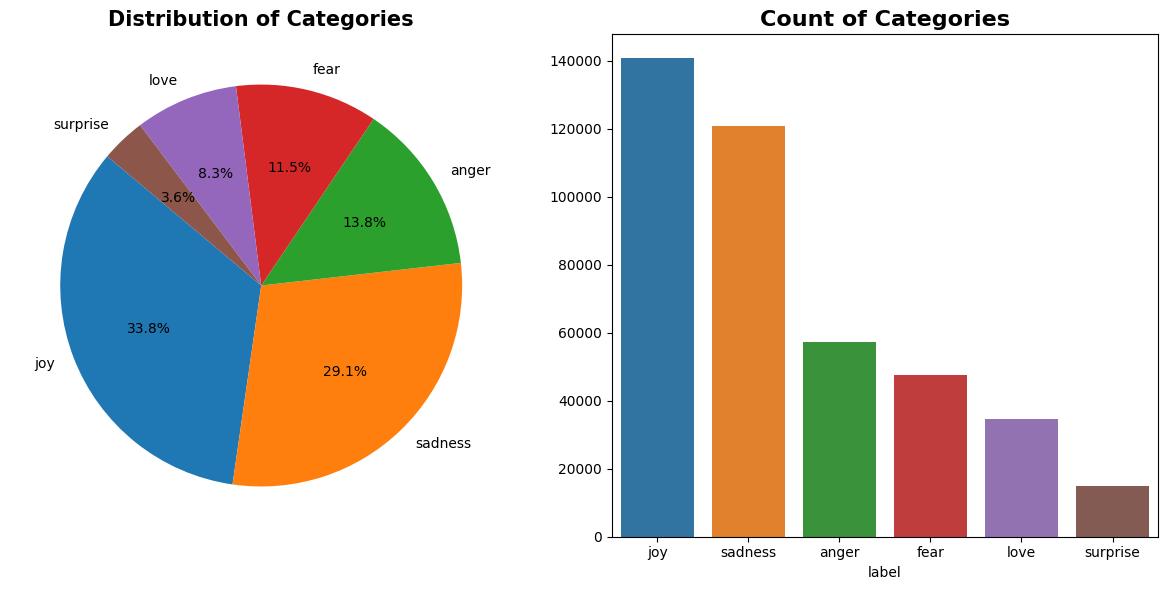

In [11]:
count = df['label'].value_counts()


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories', fontsize=15, fontweight='bold')

sns.barplot(x=count.index, y=count.values, ax=axs[1], hue=count.index, dodge=False, legend=False)
axs[1].set_title('Count of Categories', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

> Here, I Relabeled the features again to numbers

In [12]:
df['label'] = df['label'].map({
    'sadness': 0,
    'joy': 1,
    'love': 2,
    'anger': 3,
    'fear': 4,
    'surprise': 5
})
df.dropna(subset=['label'], inplace=True)
df['label'] = df['label'].astype(int)

# Text PreProcessing


> I have created a function that takes the text as input and processes it accordingly. In this task I carried out the steps;

* **Remove HTML tags**; Eliminated any HTML tags in the text

* **Removing emojis**; Changed emojis into their corresponding descriptions

* **Removing URLs**; Excluded URLs from the text to avoid web links

* **Removing Alpha Non Numeric Characters**; Cleaned the text by eliminating symbols, special characters and punctuations retaining letters

* **Removing digits**; Erased all digits from the text to focus on data

* **Lowercasing**; Standardized the text to lowercase for consistency

* **Removing White Space**; Eliminated spaces. Normalized whitespace for uniformity

* **Tokenization**; Split the text into words for processing

* **Remove stopwords**; Deleted common English stopwords to emphasize words

* **Stemming**; Reduced words to their root form, for analysis


In [13]:
porter_stemmer = PorterStemmer()

def preprocess_text(text):
    
    text = BeautifulSoup(text, 'html.parser').get_text()
    text = emoji.demojize(text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'\d+', '', text)
    words = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    words = [porter_stemmer.stem(word) for word in words]

    return ' '.join(words)

df['text'] = df['text'].apply(preprocess_text)
df[['text']].head()

,text
0,feel realli helpless heavi heart
1,ive enjoy abl slouch relax unwind frankli need...
2,gave internship dmrg feel distraught
3,dont know feel lost
4,kindergarten teacher thoroughli weari job take...


# Split the Data


> Here, I split the data into train and test with using stratify to to ensure that the class proportions in the train and test sets are the same as in the original dataset

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42,stratify=df['label'])


# Text Vectorization


> Before creating a model, I need to vectorize tokens by converting the text data into numericals features. This will improves model performances by focusing on discriminative terms.

* Initializes a TfidfVectorizer to convert text into numerical features, keeping only the top 5000 terms.
* Fits the TfidfVectorizer to the training and test data and transform the training data into the TF-IDF features.

In [16]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

# Over Sampling


> Since The data is unbalanced, a good idea will be to use over-sampling techniques; in this case, I will use SMOTE and fit it in the train data

In [17]:
X_train_sm, y_train_sm = SMOTE().fit_resample(X_train, y_train)


# Model Comparison


> Since This data is imbalanced, accuracy wouldn't be the best matric that I will use, and since we don't have a priority or an important to false positive to false negative or the opposite, Precision and Recall would be the best either, so I decided to go with F1 Score in this case to minimize the false positive and false negative

* Then I decided to use The 4 Model below with their default settings and then tune the best one on the next step
* The apply_model will
     * trains a classifier on both the original imbalanced training data and the SMOTE-balanced training data, then evaluates and prints the geometric mean, accuracy, and F1 scores for both cases on the test data

In [18]:
def apply_model(clf_class, **kwargs):
    clf = clf_class(**kwargs)
    print(clf_class)
    print("-------")
    
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    gmean = geometric_mean_score(y_test, pred, average='macro')
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred, average='macro')
    print('Imbalanced:    G-mean={:.3f}      accuracy={:.3f}     f1={:.3f}'.format(gmean, acc, f1))

    clf.fit(X_train_sm, y_train_sm)
    pred = clf.predict(X_test)
    gmean = geometric_mean_score(y_test, pred, average='macro')
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred, average='macro')
    print('SMOTE:    G-mean={:.3f}      accuracy={:.3f}     f1={:.3f}'.format(gmean, acc, f1))

def compare_models():
    apply_model(LogisticRegression, max_iter=200)  
    apply_model(RandomForestClassifier)
    apply_model(GradientBoostingClassifier)
    apply_model(xgb.XGBClassifier)

compare_models()

<class 'sklearn.linear_model._logistic.LogisticRegression'>
-------
Imbalanced:    G-mean=0.896      accuracy=0.878     f1=0.831
SMOTE:    G-mean=0.921      accuracy=0.875     f1=0.839
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
-------
Imbalanced:    G-mean=0.871      accuracy=0.837     f1=0.777
SMOTE:    G-mean=0.876      accuracy=0.825     f1=0.771
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
-------
Imbalanced:    G-mean=0.863      accuracy=0.812     f1=0.785
SMOTE:    G-mean=0.905      accuracy=0.818     f1=0.798
<class 'xgboost.sklearn.XGBClassifier'>
-------
Imbalanced:    G-mean=0.916      accuracy=0.875     f1=0.842
SMOTE:    G-mean=0.925      accuracy=0.867     f1=0.835


# Hyperparameter Tuning


> Above, I can observe that LogisticRegression and XGBClassifier had similar outputs, so I decided to go with LogisticRegression because it is faster, so I will tune its hyperparameter to get the best results out of it
* I used C_values ,solvers ,penalties and class_weights as hyperparameters to Tune to maximise the F1 Score


In [19]:
C_values = [0.01, 0.1, 1, 10, 100]
solvers = ['liblinear', 'lbfgs', 'sag', 'newton-cg']
penalties = ['l1', 'l2']
class_weights = [None, 'balanced']

print('Hyperparameter Tunning Results:\n')
max_f1 = 0
best_hyper_params = []

train_accuracies = []
val_accuracies = []

for c in C_values:
    for solver in solvers:
        for penalty in penalties:
            for class_weight in class_weights:
                if solver in ['liblinear', 'saga'] and penalty == 'l1':
                    model = LogisticRegression(C=c, solver=solver, penalty=penalty, class_weight=class_weight, max_iter=1000)
                elif solver in ['liblinear', 'lbfgs', 'sag', 'newton-cg'] and penalty == 'l2':
                    model = LogisticRegression(C=c, solver=solver, penalty=penalty, class_weight=class_weight, max_iter=1000)
                else:
                    continue
                model.fit(X_train_sm, y_train_sm)
                train_pred = model.predict(X_train_sm)
                val_pred = model.predict(X_test)
                train_acc = accuracy_score(y_train_sm, train_pred)
                val_acc = accuracy_score(y_test, val_pred)
                train_accuracies.append(train_acc)
                val_accuracies.append(val_acc)
                f1 = f1_score(y_test, val_pred, average='macro')
                print('C={:.2f} Solver={} Penalty={} Class_weight={} F1={:.3f}'.format(c, solver, penalty, class_weight, f1))
                if f1 > max_f1:
                    max_f1 = f1
                    best_hyper_params = [c, solver, penalty, class_weight]

print('-------------------------------------------------')
print('The best hyperparameters set: \n')
print('C_values={:.2f} Solver={} Penalty={} Class_weight={} F1={:.3f}'.format(best_hyper_params[0], best_hyper_params[1], best_hyper_params[2], best_hyper_params[3], max_f1))


Hyperparameter Tunning Results:

C=0.01 Solver=liblinear Penalty=l1 Class_weight=None F1=0.827
C=0.01 Solver=liblinear Penalty=l1 Class_weight=balanced F1=0.827
C=0.01 Solver=liblinear Penalty=l2 Class_weight=None F1=0.812
C=0.01 Solver=liblinear Penalty=l2 Class_weight=balanced F1=0.812
C=0.01 Solver=lbfgs Penalty=l2 Class_weight=None F1=0.816
C=0.01 Solver=lbfgs Penalty=l2 Class_weight=balanced F1=0.816
C=0.01 Solver=sag Penalty=l2 Class_weight=None F1=0.816
C=0.01 Solver=sag Penalty=l2 Class_weight=balanced F1=0.816
C=0.01 Solver=newton-cg Penalty=l2 Class_weight=None F1=0.816
C=0.01 Solver=newton-cg Penalty=l2 Class_weight=balanced F1=0.816
C=0.10 Solver=liblinear Penalty=l1 Class_weight=None F1=0.843
C=0.10 Solver=liblinear Penalty=l1 Class_weight=balanced F1=0.843
C=0.10 Solver=liblinear Penalty=l2 Class_weight=None F1=0.836
C=0.10 Solver=liblinear Penalty=l2 Class_weight=balanced F1=0.836
C=0.10 Solver=lbfgs Penalty=l2 Class_weight=None F1=0.835
C=0.10 Solver=lbfgs Penalty=l2 Cl

>I've got an F1 Score of 0.848, and the best hyperparameters set was

* C=1.00 Solver=liblinear Penalty=l1 Class_weight=None

# Visualizing The Results


## Training and Validation Accuracies


> Here, I will visualize the training and validation accuracy; I can see that the model had slightly overfitting after around 22 Model Configuration



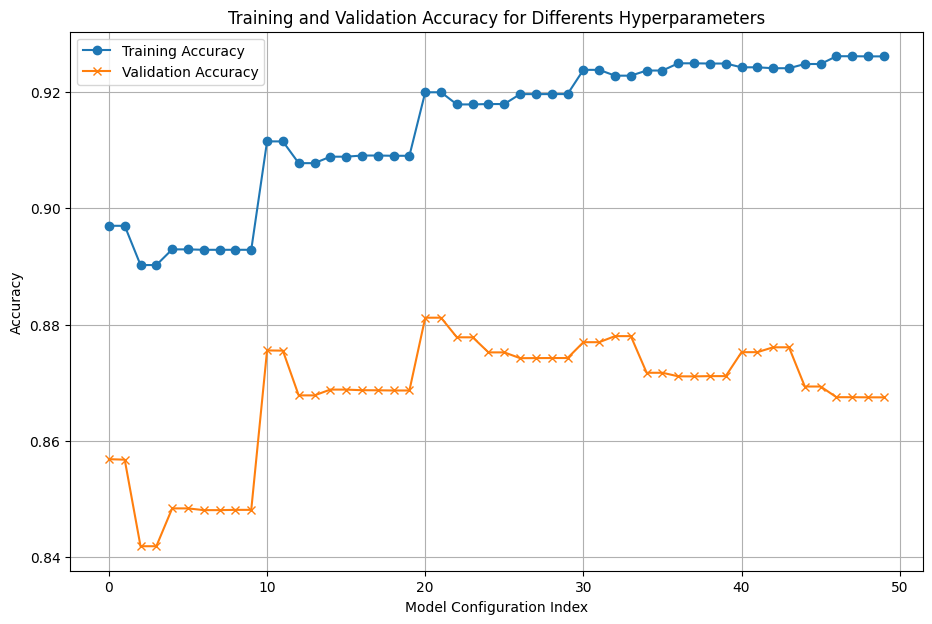

In [20]:
plt.figure(figsize=(11, 7))
plt.plot(train_accuracies, label='Training Accuracy', marker='o')
plt.plot(val_accuracies, label='Validation Accuracy', marker='x')
plt.xlabel('Model Configuration Index')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Differents Hyperparameters')
plt.legend()
plt.grid(True)
plt.show()

## Confusion Matric

* I plotted the confusion Matrix, and as I can see, the Model has recognized the emotion **"2"** which is love as emotion **"1"** which is joy with a **2172** false positives, which is acceptable because joy and love in most occasions showcase the same feelings

* that was the only one that was hard for the Model to classify. Otherwise, he has done an excellent job classifying and recognizing the other Emotions

<Axes: >

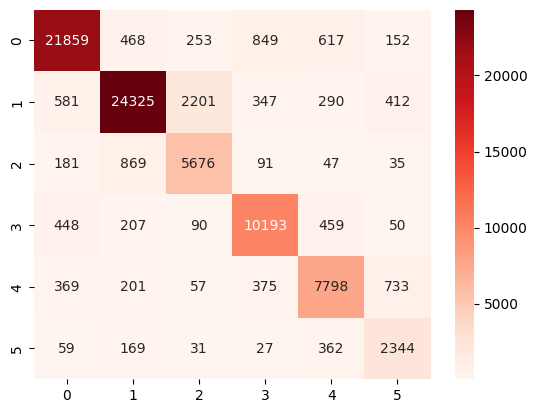

In [21]:
cm = confusion_matrix(y_test, val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

## Top 20 Words For Each Label


> Here, I plot the Top 20 Words for the 6 Emotions. I excluded the words('feel,' 'like,' and 'I'm' )because they were significant in all of the categories

* and there are specific words related to each feeling:
  * **sadness** (0): Time, Know, think, people, and life
  * **joy** (1): Make, time, love, day, people and life
  * **love** (2): Love, support, care, sweet, time and accept
  * **anger** (3): hate, people, anger, get and irrit
  * **fear** (4): Little people, scared, afraid, and anxious
  * **Surprise** (5): Amazed, impressed, weird, and strange

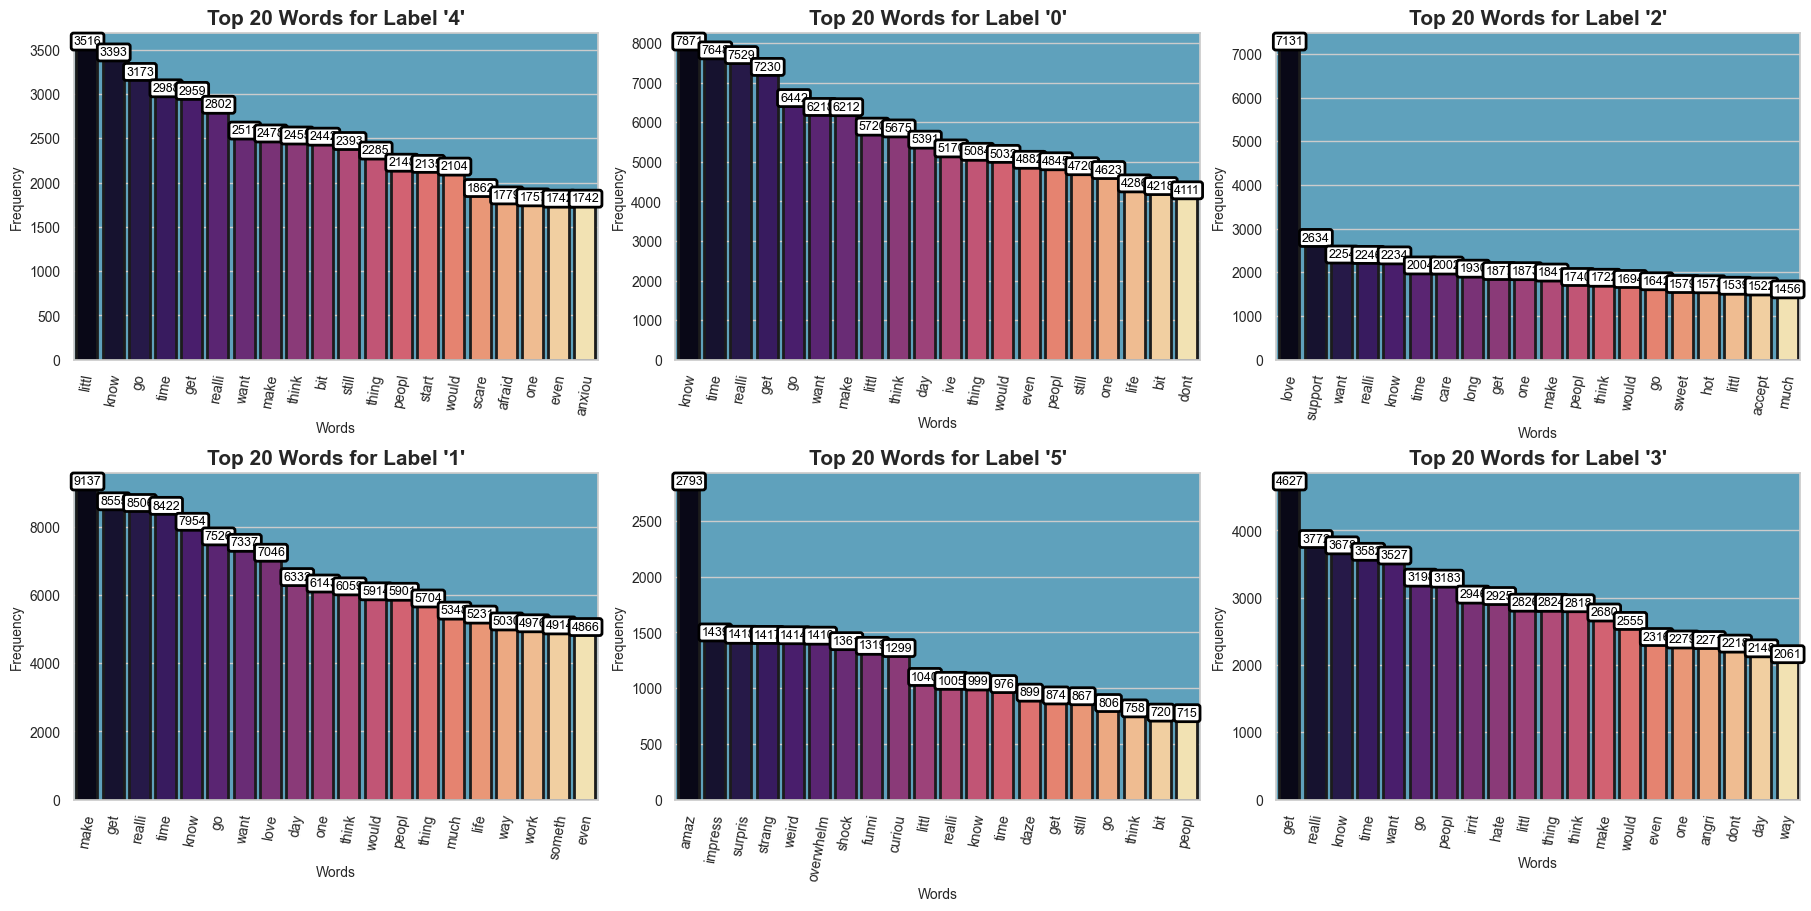

In [22]:
labels = df['label'].unique()

background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})

fig, axes = plt.subplots(2, 3, figsize=(18, 9), constrained_layout=True)

for ax, label in zip(axes.flat, labels):
    label_texts = df[df['label'] == label]['text']

    words = [word.lower() for text in label_texts for word in word_tokenize(text) if word.lower() not in {'feel', 'like', 'im'}]
    word_frequency = Counter(words)

    top_20_word = dict(word_frequency.most_common(20))

    top_20_df = pd.DataFrame(list(top_20_word.items()), columns=['word', 'frequency'])

    sns.barplot(ax=ax, data=top_20_df, x='word', y='frequency', hue='word', palette='magma', edgecolor='#1c1c1c', linewidth=2, dodge=False, legend=False)
    for cont in ax.containers:
        ax.bar_label(cont, label_type="edge", color="black", fontsize=9, padding=6, position=(0.5, 0.5),
                      bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
    ax.set_title(f"Top 20 Words for Label '{label}'", fontsize=15, fontweight='bold')
    ax.set_xlabel("Words", fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)
    ax.tick_params(axis='x', rotation=80, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

plt.show()

## WordClouds For Each Label


> Here, I plotted the WordCloud of each emotion, excluding the significant words(feel, like, im); this visualization gives a deep understanding of the word distribution for each label from smaller to more prominent display according to count number of each word

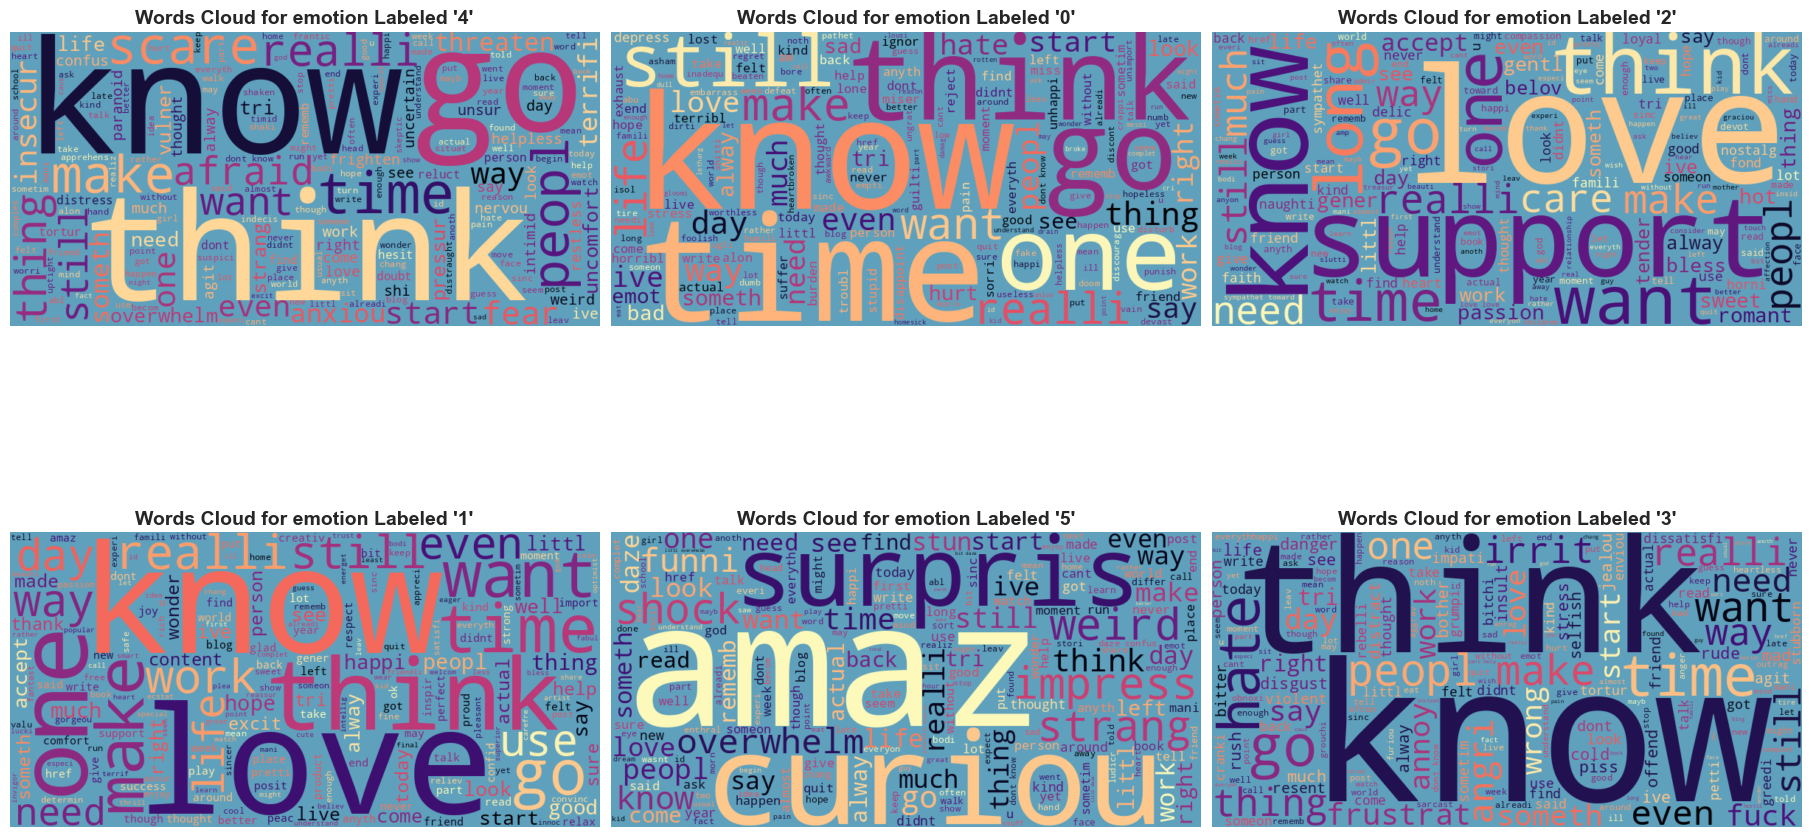

In [23]:
background_color = '#5fa1bc'

fig, axes = plt.subplots(2, 3, figsize=(18, 10), constrained_layout=True)

for ax, label in zip(axes.flat, labels):
    label_texts = df[df['label'] == label]['text']
    words = ' '.join([word.lower() for text in label_texts for word in word_tokenize(text) if word.lower() not in {'feel', 'like', 'im'}])
    wordcloud = WordCloud(width=800, height=400, background_color=background_color, colormap='magma', contour_color='black').generate(words)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"Words Cloud for emotion Labeled '{label}'", fontsize=14, fontweight='bold')
    ax.axis('off')

plt.show()

# Final Discussion


The suggested solution showcases the abilities, in identifying emotions from social media posts, with some strengths including comprehensive text preprocessing and effectively handling of class imbalance with the oversampling technique and a focus on optimizing the F1 score to balance Both precision and recall. By utilizing tuned Logistic Regression for performance it ensures both accuracy and efficiency. However there are limitations such as oversimplifying emotions and relying on predefined emotion categories that may miss subtle nuances in sentiment, The outcomes provide insights, into customer feelings guiding data informed strategies to improve customer satisfaction enhance marketing tactics and shape product development at Meta Threads, Recommendations based on data stress the importance of model enhancements, Incorporating a wider range of sentiment categories to deepen understanding and decision making processes.